In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
data=pd.read_csv('fraud.csv')
data

,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode,Fraudlabel
0,1,198765,285.88,INR,MasterCard,Online,1
1,2,198766,1777.32,EUR,American Express,Online,1
2,3,198767,3939.01,USD,Visa,In-Person,1
3,4,198768,376.44,USD,Visa,In-Person,0
4,5,198769,1687.33,INR,MasterCard,Online,1
...,...,...,...,...,...,...,...
3995,3996,202760,4542.61,INR,Visa,Online,1
3996,3997,202761,4828.59,INR,Visa,In-Person,0
3997,3998,202762,957.30,EUR,American Express,In-Person,1
3998,3999,202763,4269.58,USD,MasterCard,Online,0


In [13]:
data.shape

(4000, 7)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cust ID     4000 non-null   int64  
 1   Card Num    4000 non-null   int64  
 2   Amount      4000 non-null   float64
 3   Currency    4000 non-null   object 
 4   Card Type   4000 non-null   object 
 5   Trans Mode  4000 non-null   object 
 6   Fraudlabel  4000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 218.9+ KB


In [15]:
cd=data['Fraudlabel'].value_counts()
cd

Fraudlabel
1    2005
0    1995
Name: count, dtype: int64

In [16]:
imbalance_ratio = cd[1] / cd[0]
print("Imbalance Ratio (Fraudulent to Non-Fraudulent):", imbalance_ratio)

Imbalance Ratio (Fraudulent to Non-Fraudulent): 1.005012531328321


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust ID,4000.0,2000.500000,1154.844867,1.00,1000.7500,2000.500,3000.2500,4000.0
Card Num,4000.0,200764.500000,1154.844867,198765.00,199764.7500,200764.500,201764.2500,202764.0
Amount,4000.0,2504.591608,1460.663169,1.09,1225.1525,2520.815,3768.0675,4996.7
Fraudlabel,4000.0,0.501250,0.500061,0.00,0.0000,1.000,1.0000,1.0


In [18]:
data.isna().sum()

Cust ID       0
Card Num      0
Amount        0
Currency      0
Card Type     0
Trans Mode    0
Fraudlabel    0
dtype: int64

In [19]:
data.head(10)

,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode,Fraudlabel
0,1,198765,285.88,INR,MasterCard,Online,1
1,2,198766,1777.32,EUR,American Express,Online,1
2,3,198767,3939.01,USD,Visa,In-Person,1
3,4,198768,376.44,USD,Visa,In-Person,0
4,5,198769,1687.33,INR,MasterCard,Online,1
5,6,198770,3341.97,USD,American Express,In-Person,1
6,7,198771,1212.14,USD,MasterCard,In-Person,0
7,8,198772,1117.52,EUR,Visa,Online,0
8,9,198773,388.16,EUR,Visa,In-Person,0
9,10,198774,4514.53,USD,Visa,In-Person,1


In [20]:
#convert string values in columns 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Currency']=le.fit_transform(data['Currency'])
data.head()

,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode,Fraudlabel
0,1,198765,285.88,1,MasterCard,Online,1
1,2,198766,1777.32,0,American Express,Online,1
2,3,198767,3939.01,2,Visa,In-Person,1
3,4,198768,376.44,2,Visa,In-Person,0
4,5,198769,1687.33,1,MasterCard,Online,1


In [21]:
data['Card Type']=le.fit_transform(data['Card Type'])
data['Trans Mode']=le.fit_transform(data['Trans Mode'])
data.head()

,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode,Fraudlabel
0,1,198765,285.88,1,1,1,1
1,2,198766,1777.32,0,0,1,1
2,3,198767,3939.01,2,2,0,1
3,4,198768,376.44,2,2,0,0
4,5,198769,1687.33,1,1,1,1


array([[<Axes: title={'center': 'Cust ID'}>,
        <Axes: title={'center': 'Card Num'}>,
        <Axes: title={'center': 'Amount'}>],
       [<Axes: title={'center': 'Currency'}>,
        <Axes: title={'center': 'Card Type'}>,
        <Axes: title={'center': 'Trans Mode'}>],
       [<Axes: title={'center': 'Fraudlabel'}>, <Axes: >, <Axes: >]],
      dtype=object)

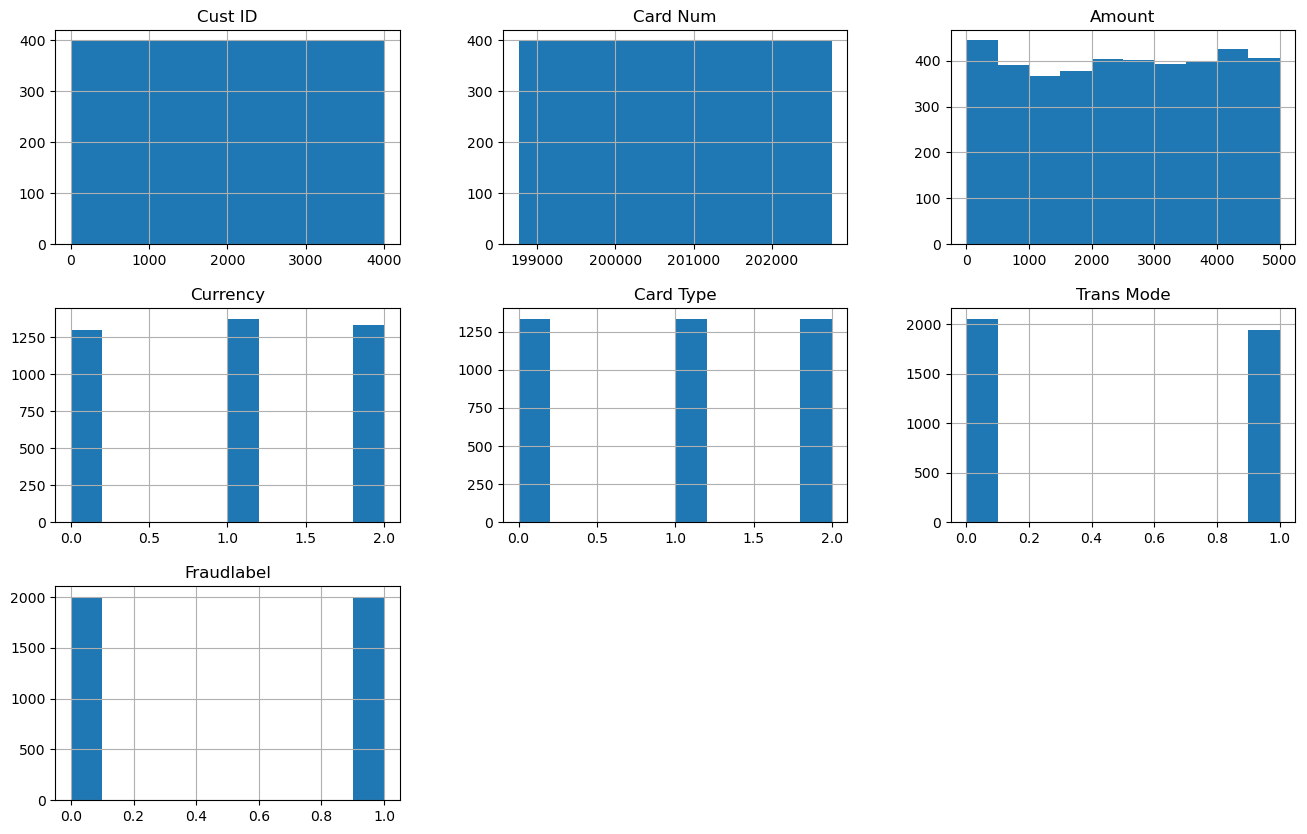

In [22]:
data.hist(figsize=(16,10))

<Axes: >

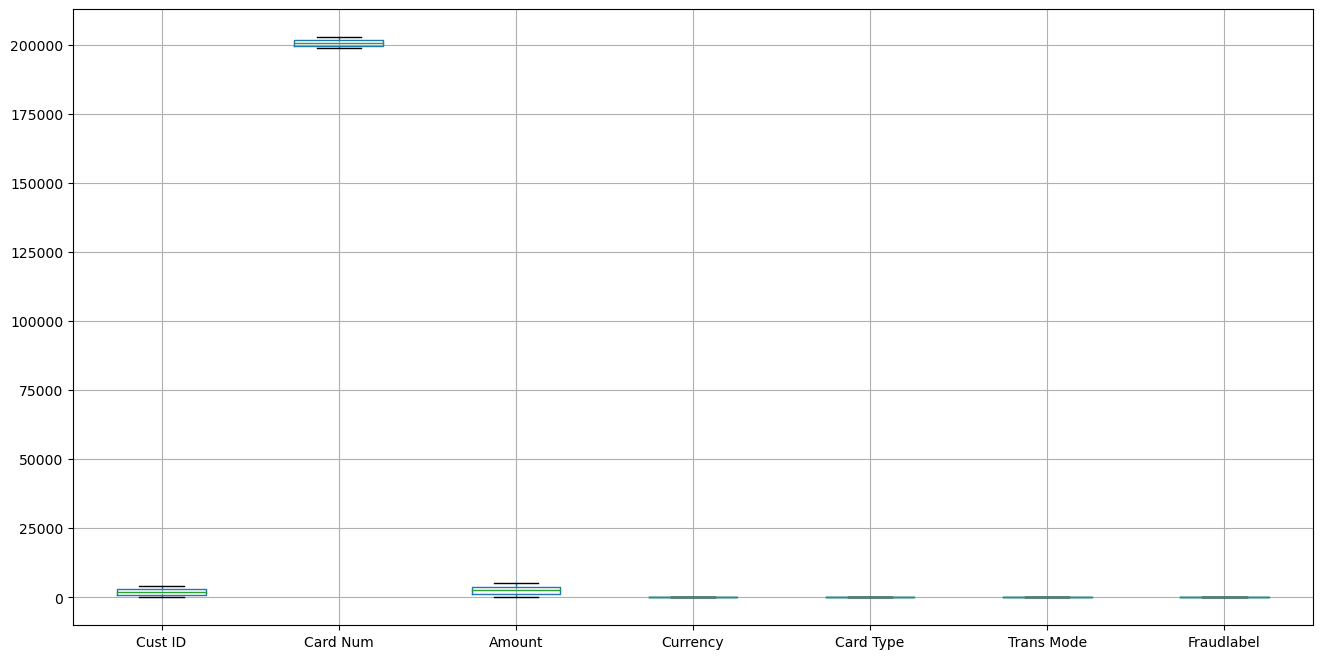

In [23]:
data.boxplot(figsize=(16,8))

<Axes: >

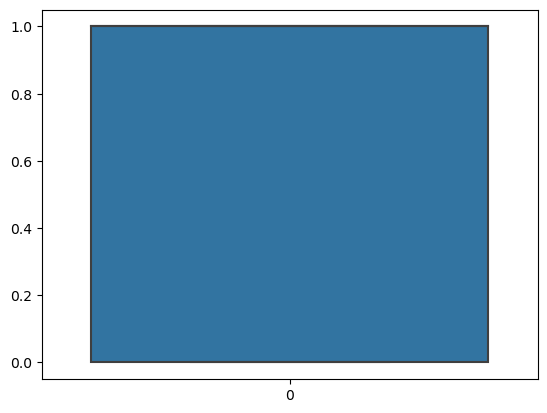

In [24]:
sns.boxplot(data['Fraudlabel'])

<Axes: >

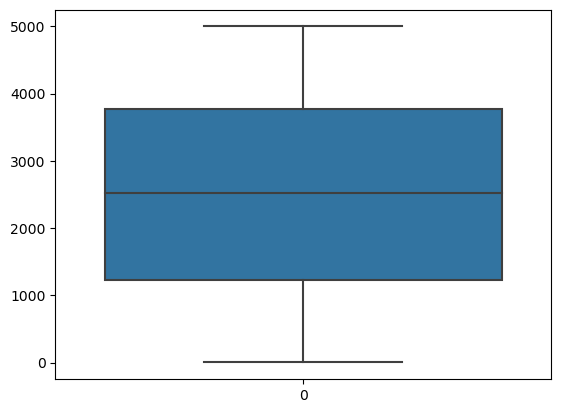

In [25]:
sns.boxplot(data['Amount'])

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


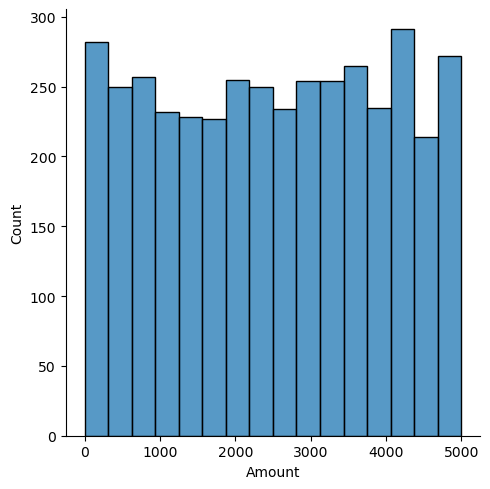

In [26]:
sns.displot(data['Amount'])

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


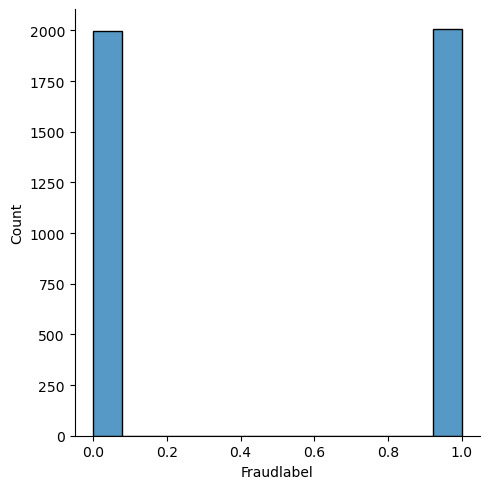

In [27]:
sns.displot(data['Fraudlabel'])

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-package

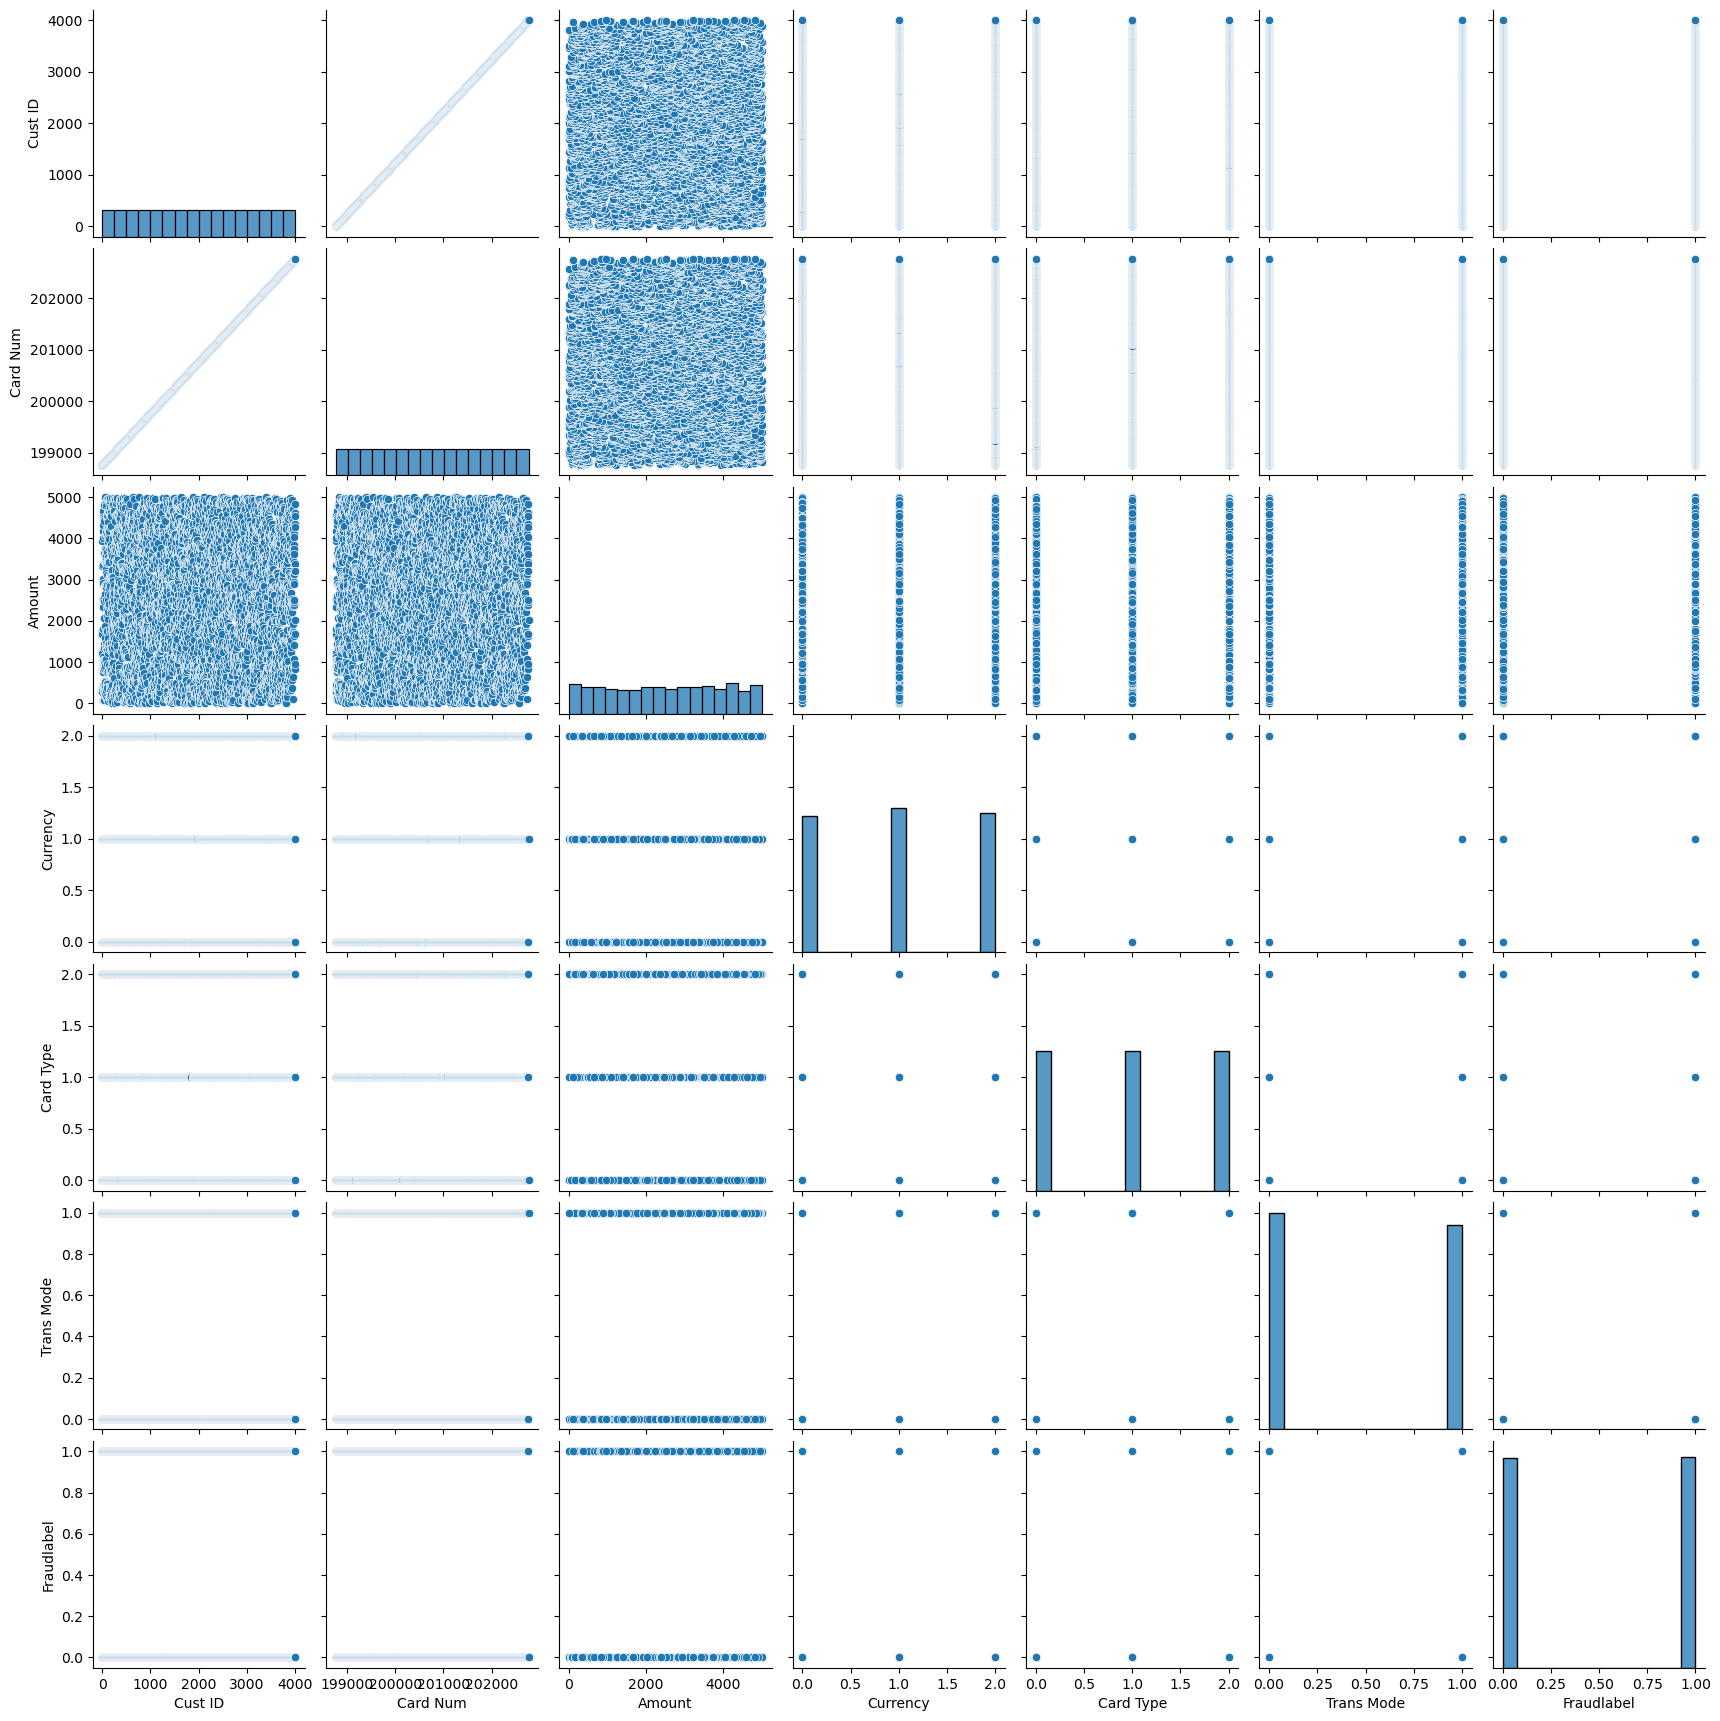

In [28]:
sns.pairplot(data)

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-package

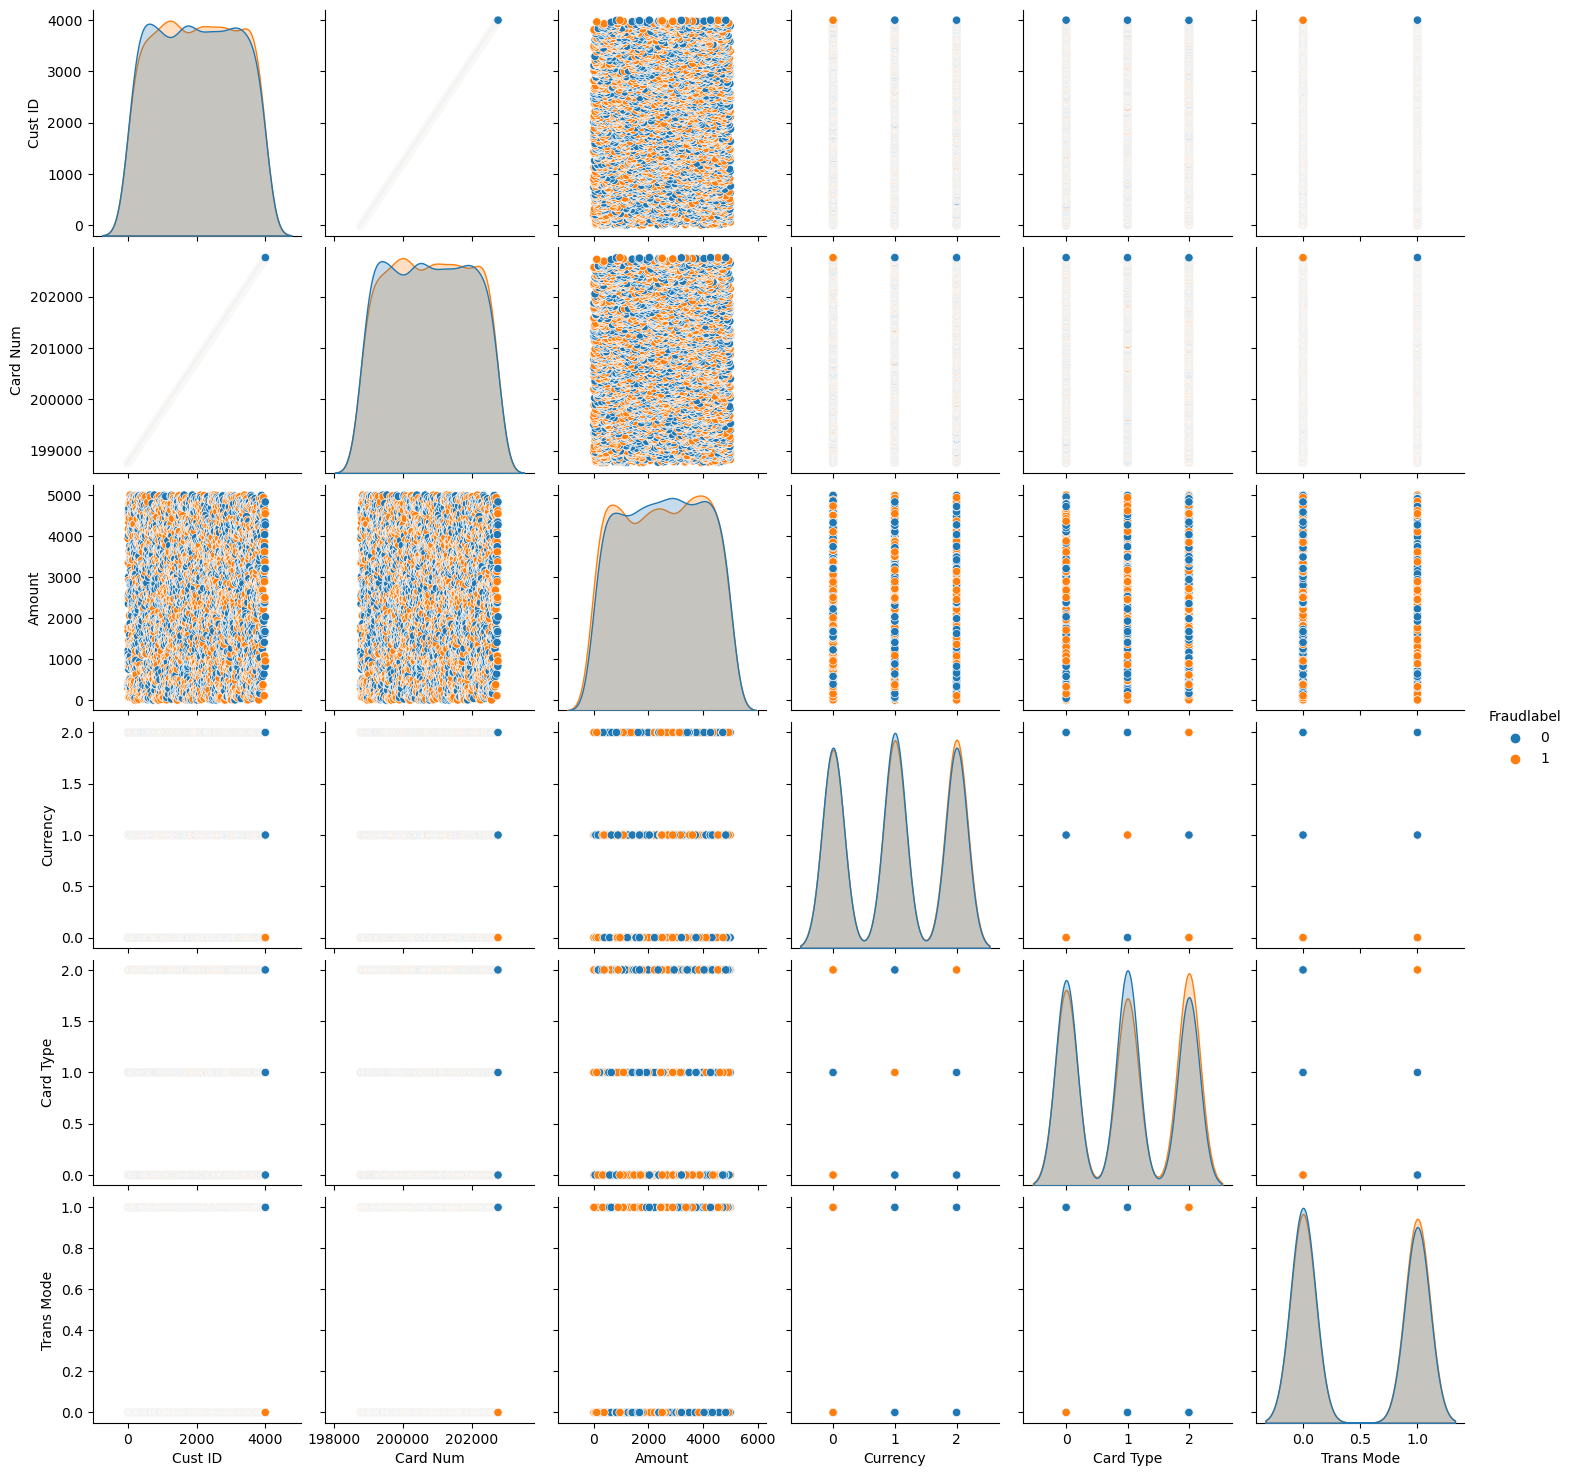

In [29]:
sns.pairplot(data,hue='Fraudlabel')

In [30]:
x=data.iloc[:,:-1]
x.head()

,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode
0,1,198765,285.88,1,1,1
1,2,198766,1777.32,0,0,1
2,3,198767,3939.01,2,2,0
3,4,198768,376.44,2,2,0
4,5,198769,1687.33,1,1,1


In [31]:
y=data.iloc[:,-1:]
y.head(3)

,Fraudlabel
0,1
1,1
2,1


In [32]:
x


,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode
0,1,198765,285.88,1,1,1
1,2,198766,1777.32,0,0,1
2,3,198767,3939.01,2,2,0
3,4,198768,376.44,2,2,0
4,5,198769,1687.33,1,1,1
...,...,...,...,...,...,...
3995,3996,202760,4542.61,1,2,1
3996,3997,202761,4828.59,1,2,0
3997,3998,202762,957.30,0,0,0
3998,3999,202763,4269.58,2,1,1


In [33]:
y

,Fraudlabel
0,1
1,1
2,1
3,0
4,1
...,...
3995,1
3996,0
3997,1
3998,0


<Axes: ylabel='count'>

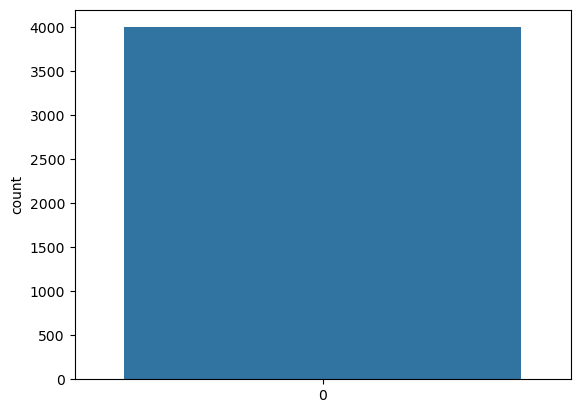

In [34]:
sns.countplot(data['Fraudlabel'])

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (3200, 6)

Training data-y-Shape:	 (3200, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (800, 6)

Testing data(y-outcome)shape:	 (800, 1)


In [36]:
log_reg=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression**********************')
#train the model
print("Training Started.......\n")
print()
log_reg.fit(xtrain,ytrain)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred=log_reg.predict(xtest)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred))

********************Logistic Regression**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0
 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0
 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))
print()
print('Precision Score:\t',precision_score(ytest,ypred))
print()
print('Recall Score:\t',recall_score(ytest,ypred))
print()
print('F1 Score:\t',f1_score(ytest,ypred))

*******************Performance Measures for Logistic Regression*************
Accuracy Score:	 0.5025

Confusion Matrix:
 [[194 206]
 [192 208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49       400
           1       0.50      0.52      0.51       400

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800


Precision Score:	 0.5024154589371981

Recall Score:	 0.52

F1 Score:	 0.5110565110565112


In [38]:
log_reg.classes_

array([0, 1], dtype=int64)

In [39]:
log_reg.coef_

array([[ 1.00090671e-05, -7.17464603e-07, -1.51767287e-05,
         4.53262935e-02,  1.02025251e-01,  4.23052102e-02]])

In [40]:
log_reg.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(solver='liblinear', verbose=2)>

In [41]:
log_reg.dual

False

In [42]:
log_reg.feature_names_in_

array(['Cust ID', 'Card Num', 'Amount', 'Currency', 'Card Type',
       'Trans Mode'], dtype=object)

In [43]:
log_reg.fit_intercept

True

In [44]:
log_reg.intercept_

array([-5.39650974e-11])

In [45]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

In [46]:
y_probs=log_reg.predict_proba(xtest)[:,1]
y_probs

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([0.47918848, 0.52802045, 0.50439274, 0.5069789 , 0.50872049,
       0.52294919, 0.477762  , 0.5260484 , 0.50084885, 0.52331789,
       0.47115924, 0.47149376, 0.47078874, 0.47074559, 0.46894479,
       0.49615407, 0.52895873, 0.47761053, 0.48877103, 0.4932668 ,
       0.48879135, 0.50347286, 0.53383386, 0.49497066, 0.49177569,
       0.48844661, 0.49792089, 0.53727973, 0.49730762, 0.52251638,
       0.47145895, 0.44867773, 0.48003309, 0.50915061, 0.49285828,
       0.49968923, 0.50199847, 0.53895913, 0.54361449, 0.48749959,
       0.52109418, 0.49763663, 0.50642406, 0.5217065 , 0.53057068,
       0.4848149 , 0.51692729, 0.55346782, 0.48980434, 0.46588483,
       0.50090492, 0.52592829, 0.47433841, 0.48699726, 0.53969276,
       0.51746371, 0.49470356, 0.51873615, 0.50812111, 0.48638132,
       0.49440553, 0.50577998, 0.48914547, 0.48252644, 0.52358353,
       0.5175565 , 0.4611825 , 0.52806349, 0.47150049, 0.45943062,
       0.50384799, 0.46467434, 0.54585878, 0.51521185, 0.49451

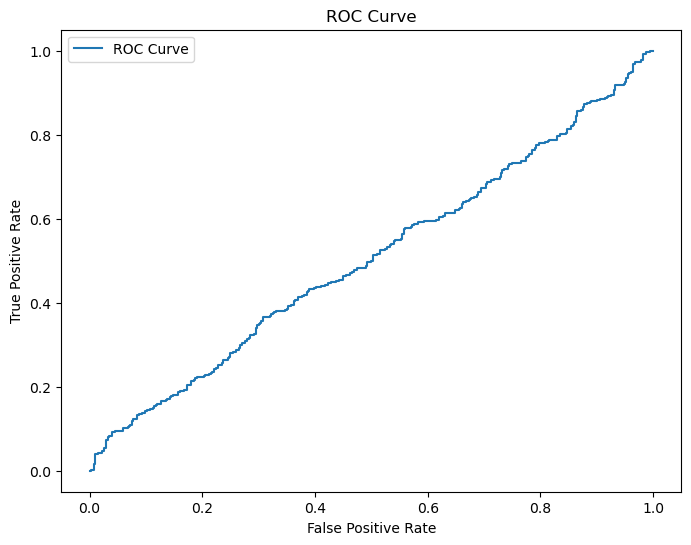

In [47]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

#Calculate ROC & AUC
fpr,tpr,thresholds=roc_curve(ytest,y_probs)
roc_auc=auc(fpr,tpr)

#plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [48]:
#Area under ROC curve
roc_auc

0.5061625

In [49]:
cm=confusion_matrix(ytest,ypred)
cm

array([[194, 206],
       [192, 208]], dtype=int64)

In [50]:
#Scaling the model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

In [51]:
sc_x.shape

(4000, 6)

In [52]:
sc_x[0]

array([-1.73161785, -1.73161785, -1.51916544, -0.01018455,  0.        ,
        1.02943297])

In [53]:
sc_train_x=sc.fit_transform(xtrain)
sc_train_x

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

array([[ 2.30578362e-01,  2.30578362e-01, -8.59855930e-01,
         1.23829268e+00, -1.91202492e-03,  1.02084215e+00],
       [-8.81829069e-01, -8.81829069e-01,  3.25250481e-01,
        -1.24061666e+00, -1.91202492e-03, -9.79583375e-01],
       [ 3.37923515e-01,  3.37923515e-01, -1.02365490e+00,
        -1.24061666e+00, -1.22560797e+00,  1.02084215e+00],
       ...,
       [-7.13885846e-01, -7.13885846e-01, -1.50127158e+00,
        -1.24061666e+00, -1.22560797e+00, -9.79583375e-01],
       [ 5.69061869e-01,  5.69061869e-01,  1.62937354e+00,
        -1.24061666e+00,  1.22178392e+00,  1.02084215e+00],
       [-1.11469880e+00, -1.11469880e+00, -4.02950561e-01,
        -1.16198875e-03,  1.22178392e+00,  1.02084215e+00]])

In [54]:
sc_train_x.shape

(3200, 6)

In [55]:
sc_train_x[0]

array([ 0.23057836,  0.23057836, -0.85985593,  1.23829268, -0.00191202,
        1.02084215])

In [56]:
sc_test_x=sc.fit_transform(xtest)
sc_test_x

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

array([[ 0.34973119,  0.34973119, -1.35725253, -0.04560661, -1.224418  ,
        -0.93933644],
       [ 0.11026505,  0.11026505,  0.98348301,  1.1705697 ,  1.23981948,
        -0.93933644],
       [ 0.65774018,  0.65774018, -1.15390805, -0.04560661,  0.00770074,
        -0.93933644],
       ...,
       [ 1.07854119,  1.07854119,  0.41556524, -1.26178292,  1.23981948,
        -0.93933644],
       [ 0.22565996,  0.22565996,  0.70330028,  1.1705697 , -1.224418  ,
         1.06458129],
       [-0.82937927, -0.82937927,  1.14230284,  1.1705697 , -1.224418  ,
        -0.93933644]])

In [57]:
sc_test_x[0]

array([ 0.34973119,  0.34973119, -1.35725253, -0.04560661, -1.224418  ,
       -0.93933644])

In [58]:
log_reg_sc=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred=log_reg_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred))

********************Logistic Regression**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1
 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1
 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1
 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
#Performance Measures for log reg model which is built after scaling
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))
print()
print('Precision Score:\t',precision_score(ytest,ypred))
print()
print('Recall Score:\t',recall_score(ytest,ypred))
print()
print('F1 Score:\t',f1_score(ytest,ypred))

*******************Performance Measures for Logistic Regression*************
Accuracy Score:	 0.5

Confusion Matrix:
 [[190 210]
 [190 210]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.47      0.49       400
           1       0.50      0.53      0.51       400

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800


Precision Score:	 0.5

Recall Score:	 0.525

F1 Score:	 0.5121951219512195


In [60]:
from imblearn.over_sampling import RandomOverSampler

In [61]:
ros=RandomOverSampler(random_state=42)
ros_x,ros_y=ros.fit_resample(sc_train_x,ytrain)

In [62]:
log_reg_ros=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression with oversampling data(RandomOverSampler)**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_ros.fit(ros_x,ros_y)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred_ros=log_reg_ros.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_ros)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred_ros))

********************Logistic Regression with oversampling data(RandomOverSampler)**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1
 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
#Performance Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures for Logistic Regression after oversampling*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred_ros))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_ros))
print()
print('Classification Report:\n',classification_report(ytest,ypred_ros))
print()
print('Precision Score:\t',precision_score(ytest,ypred_ros))
print()
print('Recall Score:\t',recall_score(ytest,ypred_ros))
print()
print('F1 Score:\t',f1_score(ytest,ypred_ros))

*******************Performance Measures for Logistic Regression after oversampling*************
Accuracy Score:	 0.50375

Confusion Matrix:
 [[206 194]
 [203 197]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51       400
           1       0.50      0.49      0.50       400

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800


Precision Score:	 0.5038363171355499

Recall Score:	 0.4925

F1 Score:	 0.49810366624525915


In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data
sm_train_x, sm_train_y = smote.fit_resample(sc_train_x, ytrain)

In [66]:
log_reg_sm=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression with oversampling data(SMOTE)**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_sm.fit(sm_train_x,sm_train_y)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred_sm=log_reg_sm.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sm)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred_sm))

********************Logistic Regression with oversampling data(SMOTE)**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1
 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
#Performance Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures of log reg after oversampling*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sm))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sm))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sm))
print()
print('Precision Score:\t',precision_score(ytest,ypred_sm))
print()
print('Recall Score:\t',recall_score(ytest,ypred_sm))
print()
print('F1 Score:\t',f1_score(ytest,ypred_sm))

*******************Performance Measures of log reg after oversampling*************
Accuracy Score:	 0.505

Confusion Matrix:
 [[208 192]
 [204 196]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51       400
           1       0.51      0.49      0.50       400

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.50       800
weighted avg       0.51      0.51      0.50       800


Precision Score:	 0.5051546391752577

Recall Score:	 0.49

F1 Score:	 0.4974619289340101


In [68]:
from imblearn.under_sampling import RandomUnderSampler

In [69]:
# Create a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=42)

# Fit and resample the training data
rus_train_x, rus_train_y = rus.fit_resample(sc_train_x, ytrain)
print(rus_train_x,rus_train_y)

[[ 2.30578362e-01  2.30578362e-01 -8.59855930e-01  1.23829268e+00
  -1.91202492e-03  1.02084215e+00]
 [-8.81829069e-01 -8.81829069e-01  3.25250481e-01 -1.24061666e+00
  -1.91202492e-03 -9.79583375e-01]
 [-1.70942557e+00 -1.70942557e+00  7.31569895e-02 -1.16198875e-03
  -1.22560797e+00  1.02084215e+00]
 ...
 [-1.52070587e+00 -1.52070587e+00  1.43471660e-01 -1.24061666e+00
   1.22178392e+00  1.02084215e+00]
 [ 5.47419701e-01  5.47419701e-01  9.75953107e-01 -1.24061666e+00
  -1.91202492e-03  1.02084215e+00]
 [-4.44657277e-01 -4.44657277e-01  1.39726069e+00 -1.16198875e-03
   1.22178392e+00 -9.79583375e-01]]       Fraudlabel
0              0
1              0
2              0
3              0
4              0
...          ...
3185           1
3186           1
3187           1
3188           1
3189           1

[3190 rows x 1 columns]


In [70]:
log_reg_rus=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression with undersampling data(RandomUnderSampler)**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_rus.fit(rus_train_x,rus_train_y)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred_rus=log_reg_rus.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_rus)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred_rus))

********************Logistic Regression with undersampling data(RandomUnderSampler)**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1
 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0
 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1
 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
#Performance Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures after undersampling*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred_rus))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rus))
print()
print('Classification Report:\n',classification_report(ytest,ypred_rus))
print()
print('Precision Score:\t',precision_score(ytest,ypred_rus))
print()
print('Recall Score:\t',recall_score(ytest,ypred_rus))
print()
print('F1 Score:\t',f1_score(ytest,ypred_rus))

*******************Performance Measures after undersampling*************
Accuracy Score:	 0.4975

Confusion Matrix:
 [[202 198]
 [204 196]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50       400
           1       0.50      0.49      0.49       400

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800


Precision Score:	 0.49746192893401014

Recall Score:	 0.49

F1 Score:	 0.49370277078085645
